In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-motor-vehicle-collisions/Motor_Vehicle_Collisions_-_Crashes.csv


In [2]:
try:
    import imblearn
    print("imbalanced-learn version:", imblearn.__version__)
except ModuleNotFoundError:
    # If not found, install it
    !pip install imbalanced-learn==0.10.1
    import imblearn
    print("Installed imbalanced-learn version:", imblearn.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
Installed imbalanced-learn version: 0.10.1


In [3]:
dataset = pd.read_csv('/kaggle/input/nyc-motor-vehicle-collisions/Motor_Vehicle_Collisions_-_Crashes.csv', low_memory=False)


In [4]:
pd.set_option('display.max_columns', None)
dataset.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


Now i will start dividing feature into numerical, categorical and temporal 

In [5]:

dataset.columns = dataset.columns.str.lower()
dataset.columns


Index(['crash date', 'crash time', 'borough', 'zip code', 'latitude',
       'longitude', 'location', 'on street name', 'cross street name',
       'off street name', 'number of persons injured',
       'number of persons killed', 'number of pedestrians injured',
       'number of pedestrians killed', 'number of cyclist injured',
       'number of cyclist killed', 'number of motorist injured',
       'number of motorist killed', 'contributing factor vehicle 1',
       'contributing factor vehicle 2', 'contributing factor vehicle 3',
       'contributing factor vehicle 4', 'contributing factor vehicle 5',
       'collision_id', 'vehicle type code 1', 'vehicle type code 2',
       'vehicle type code 3', 'vehicle type code 4', 'vehicle type code 5'],
      dtype='object')

In [6]:
temporal_feat = [feature for feature in dataset.columns if 'date' in feature or 'time' in feature]
cat_feat = [feature for feature in dataset.columns if dataset[feature].dtypes =='O']
num_feat = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

Now lets see what feature comes in to these categories

In [7]:
print(f"numerical feature are {num_feat} and their count is {len(num_feat)}")

numerical feature are ['latitude', 'longitude', 'number of persons injured', 'number of persons killed', 'number of pedestrians injured', 'number of pedestrians killed', 'number of cyclist injured', 'number of cyclist killed', 'number of motorist injured', 'number of motorist killed', 'collision_id'] and their count is 11


In [8]:
print(f"categorical features are {cat_feat} and their count is {len(cat_feat)}")

categorical features are ['crash date', 'crash time', 'borough', 'zip code', 'location', 'on street name', 'cross street name', 'off street name', 'contributing factor vehicle 1', 'contributing factor vehicle 2', 'contributing factor vehicle 3', 'contributing factor vehicle 4', 'contributing factor vehicle 5', 'vehicle type code 1', 'vehicle type code 2', 'vehicle type code 3', 'vehicle type code 4', 'vehicle type code 5'] and their count is 18


In [9]:
print(f"temporal feature are {temporal_feat} and their count is {len(temporal_feat)}")

temporal feature are ['crash date', 'crash time'] and their count is 2


Now lets further divide numerical feature into continuous and discrete

In [7]:
cont_feat = [feat for feat in num_feat if dataset[feat].nunique() > 27]
disc_feat = [feat for feat in num_feat if dataset[feat].nunique() < 27]

In [11]:
print(f"continuous feature are {cont_feat} and their count is {len(cont_feat)}")

continuous feature are ['latitude', 'longitude', 'number of persons injured', 'number of motorist injured', 'collision_id'] and their count is 5


In [12]:
print(f"discrete feature are {disc_feat} and their count is {len(disc_feat)}")

discrete feature are ['number of persons killed', 'number of pedestrians injured', 'number of pedestrians killed', 'number of cyclist injured', 'number of cyclist killed', 'number of motorist killed'] and their count is 6


**Goal: Build a model to classify whether a collision will result in injuries only, fatalities, or no casualties, based on pre-crash features (time, location, vehicle type, contributing factors).**

note: In this dataset borough means town

Since there are multiple feature representing injury and death( pedestrian, cyclist, motorist and persons I would first collapse these 8 classes into 3, killed, injure and no casuality

the models I will take into consideration are SVM, Logistic, Decision trees, Random forests and XGBoost

In [8]:
killed_cols = [
    'number of persons killed',
    'number of pedestrians killed',
    'number of motorist killed',
    'number of cyclist killed'
]

injured_cols = [
    'number of persons injured',
    'number of pedestrians injured',
    'number of motorist injured',
    'number of cyclist injured'
]


killed_mask  = dataset[killed_cols].gt(0).any(axis=1)
injured_mask = dataset[injured_cols].gt(0).any(axis=1)

dataset['severity'] = np.where(
    killed_mask,
    'fatality',
    np.where(injured_mask, 'injury_only', 'no_casualty')
)


In [14]:
dataset.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,off street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,contributing factor vehicle 3,contributing factor vehicle 4,contributing factor vehicle 5,collision_id,vehicle type code 1,vehicle type code 2,vehicle type code 3,vehicle type code 4,vehicle type code 5,severity
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,injury_only
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,injury_only
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,injury_only
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,no_casualty
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,no_casualty


In [9]:
# NOw i will extract year, month, day fro crashdate
# Make sure your column is in datetime format
dataset['crash date'] = pd.to_datetime(dataset['crash date'])

# Extract year, month, and day
dataset['year'] = dataset['crash date'].dt.year
dataset['month'] = dataset['crash date'].dt.month
dataset['day'] = dataset['crash date'].dt.day
dataset['weekday'] = dataset['crash date'].dt.dayofweek


In [16]:
dataset.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,off street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,contributing factor vehicle 3,contributing factor vehicle 4,contributing factor vehicle 5,collision_id,vehicle type code 1,vehicle type code 2,vehicle type code 3,vehicle type code 4,vehicle type code 5,severity,year,month,day,weekday
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,injury_only,2021,9,11,5
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,injury_only,2022,3,26,5
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,injury_only,2023,11,1,2
3,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,no_casualty,2022,6,29,2
4,2022-09-21,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,no_casualty,2022,9,21,2


Now we will check the distribution of continuous features

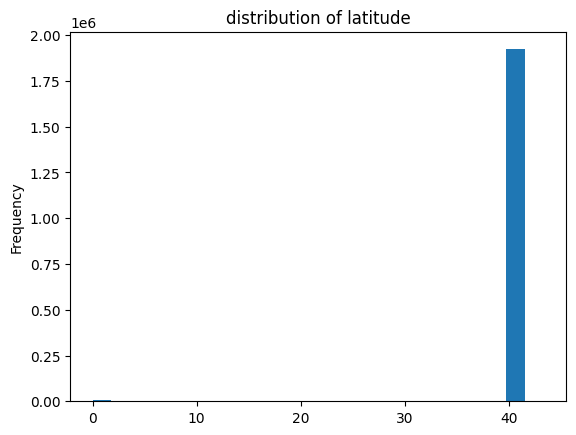

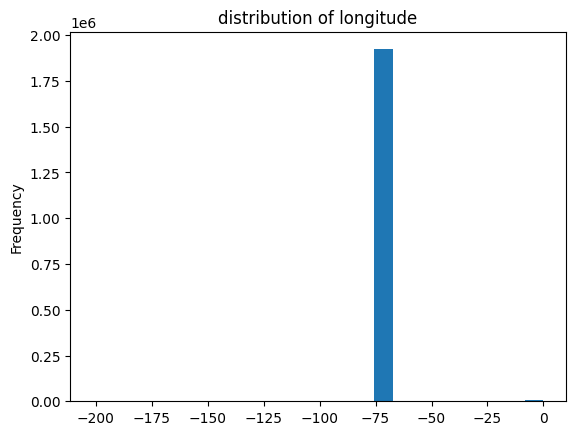

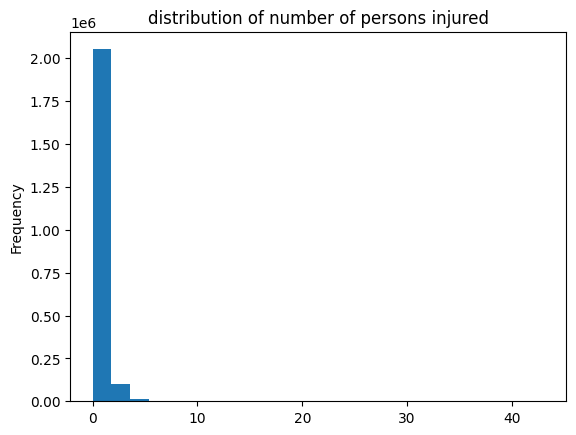

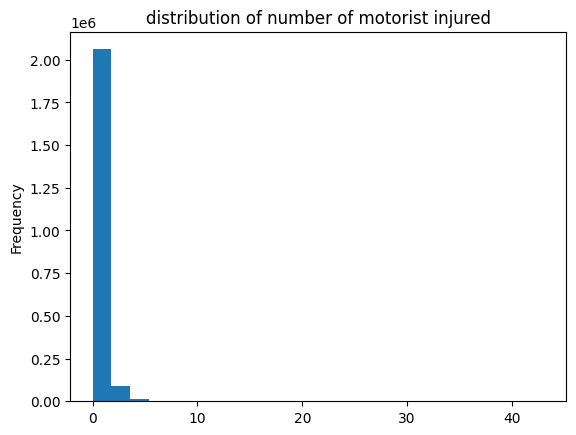

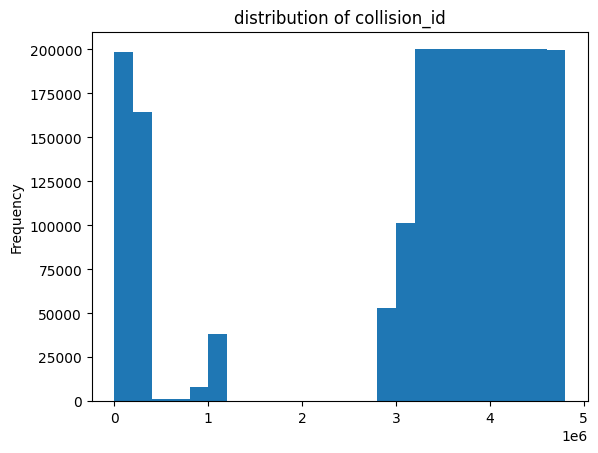

In [17]:
import matplotlib.pyplot as plt
for feat in cont_feat:
    dataset[feat].plot(kind='hist', bins = 24)
    plt.title(f"distribution of {feat}")
    plt.show()

Since most of the accidents happen in NYC most of the cordinates will have 40.___ and -73.___

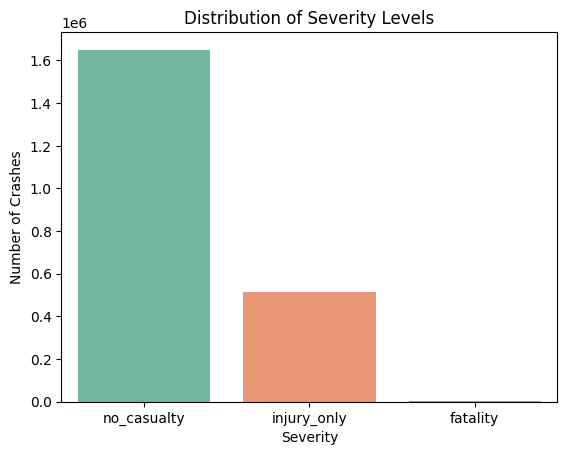

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dataset, x='severity', order=['no_casualty', 'injury_only', 'fatality'], palette='Set2')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity')
plt.ylabel('Number of Crashes')
plt.show()


As we can see there is ahuge class imbalance here 

In [10]:
nan_num_feat = [feature for feature in num_feat if dataset[feature].isnull().sum()>1]
nan_cat_feat = [feature for feature in cat_feat if dataset[feature].isnull().sum()>1]

In [20]:
for feat in nan_num_feat:
    print(f"the missing values in {feat} are {dataset[feat].isnull().mean()}")

the missing values in latitude are 0.11062733922593013
the missing values in longitude are 0.11062733922593013
the missing values in number of persons injured are 8.302897065294905e-06
the missing values in number of persons killed are 1.4299433834674558e-05


so missing values are around 10% in latittude and longitude but almost nothing in no of persons injured and killed


In [21]:
for feat in nan_cat_feat:
    print(f"the missing values in {feat} are {dataset[feat].isnull().mean()}")

the missing values in borough are 0.3090679629026559
the missing values in zip code are 0.30919204508657616
the missing values in location are 0.11062733922593013
the missing values in on street name are 0.21557272922684345
the missing values in cross street name are 0.38154118375326
the missing values in off street name are 0.8270368159681316
the missing values in contributing factor vehicle 1 are 0.003447547370334118
the missing values in contributing factor vehicle 2 are 0.1587486242560835
the missing values in contributing factor vehicle 3 are 0.9278441343261138
the missing values in contributing factor vehicle 4 are 0.9835561123621834
the missing values in contributing factor vehicle 5 are 0.9955049037832612
the missing values in vehicle type code 1 are 0.0070662266746251475
the missing values in vehicle type code 2 are 0.19750562521276174
the missing values in vehicle type code 3 are 0.9305873192620754
the missing values in vehicle type code 4 are 0.9841470018699969
the missing v

'off street name','contributing factor vehicle 3', 'contributing factor vehicle 4', 'contributing factor vehicle 5','vehicle type code 3', 
'vehicle type code 4', 'vehicle type code 5'

these feature will be dropped because of their less significance and high percentage of missing values


In [11]:
df = dataset.copy() # best make a copy of original dataset and then make changes in it
cols_to_drop = [
    'off street name',
    'contributing factor vehicle 3', 'contributing factor vehicle 4', 'contributing factor vehicle 5',
    'vehicle type code 3', 'vehicle type code 4', 'vehicle type code 5'
]
df.drop(columns=cols_to_drop, inplace=True)


In [23]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,severity,year,month,day,weekday
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan,injury_only,2021,9,11,5
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN,injury_only,2022,3,26,5
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,4675373,Moped,Sedan,injury_only,2023,11,1,2
3,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,no_casualty,2022,6,29,2
4,2022-09-21,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,4566131,Station Wagon/Sport Utility Vehicle,NaN,no_casualty,2022,9,21,2


In [12]:
nan_cat_feat1 = []
for feat in nan_cat_feat:
    if feat not in cols_to_drop:
        print(f"the missing values in {feat} are {df[feat].isnull().mean()}")
        nan_cat_feat1.append(feat)


nan_cat_feat1
    

the missing values in borough are 0.3090679629026559
the missing values in zip code are 0.30919204508657616
the missing values in location are 0.11062733922593013
the missing values in on street name are 0.21557272922684345
the missing values in cross street name are 0.38154118375326
the missing values in contributing factor vehicle 1 are 0.003447547370334118
the missing values in contributing factor vehicle 2 are 0.1587486242560835
the missing values in vehicle type code 1 are 0.0070662266746251475
the missing values in vehicle type code 2 are 0.19750562521276174


['borough',
 'zip code',
 'location',
 'on street name',
 'cross street name',
 'contributing factor vehicle 1',
 'contributing factor vehicle 2',
 'vehicle type code 1',
 'vehicle type code 2']

Now we will fill the missing values


I will impute with 'unknown' for the rest missing value(categorical feature), because I will be primarily using tree based models




In [25]:
# lets check the cardinality or dimension of each categorical feature
for feat in nan_cat_feat1:
    print(f"the number of unique value in {feat} are {len(df[feat].unique())}")
    
    

the number of unique value in borough are 6
the number of unique value in zip code are 236
the number of unique value in location are 313456
the number of unique value in on street name are 21687
the number of unique value in cross street name are 23684
the number of unique value in contributing factor vehicle 1 are 62
the number of unique value in contributing factor vehicle 2 are 62
the number of unique value in vehicle type code 1 are 1769
the number of unique value in vehicle type code 2 are 1980


Since feature have have high cardinality, I will first find rare categories inthose features and label them as 'other'

First I will impute the missing values with 'unknown' and then encode

In [13]:
for feat in nan_cat_feat1:
    df[feat] = df[feat].fillna('unknown')

In [27]:
df[nan_cat_feat1].isnull().sum()

borough                          0
zip code                         0
location                         0
on street name                   0
cross street name                0
contributing factor vehicle 1    0
contributing factor vehicle 2    0
vehicle type code 1              0
vehicle type code 2              0
dtype: int64

In [28]:
# lets check the cardinality or dimension of each categorical feature
for feat in nan_cat_feat1:
    print(f"the number of unique value in {feat} are {len(df[feat].unique())}")
    
    

the number of unique value in borough are 6
the number of unique value in zip code are 236
the number of unique value in location are 313456
the number of unique value in on street name are 21687
the number of unique value in cross street name are 23684
the number of unique value in contributing factor vehicle 1 are 62
the number of unique value in contributing factor vehicle 2 are 62
the number of unique value in vehicle type code 1 are 1768
the number of unique value in vehicle type code 2 are 1979


To decrease cardinality I will group rare categories to 'others'

In [14]:
def group_rare_categories(df, column, threshold=100, new_value='other'):
    """
    Groups rare categories in a column based on frequency threshold.

    Parameters:
        df (pd.DataFrame): The dataset
        column (str): Column name to process
        threshold (int): Minimum number of occurrences to keep
        new_value (str): Value to assign to rare categories

    Returns:
        pd.Series: Transformed column with rare categories grouped
    """
    value_counts = df[column].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    return df[column].apply(lambda x: new_value if x in rare_categories else x)


In [15]:
for feat in nan_cat_feat1:
    if feat not in ['borough', 'location']:
        df[feat] = group_rare_categories(df, feat, threshold=100)


In [31]:
# lets check the cardinality or dimension of each categorical feature
for feat in nan_cat_feat1:
    print(f"the number of unique value in {feat} are {len(df[feat].unique())}")
    
    

the number of unique value in borough are 6
the number of unique value in zip code are 189
the number of unique value in location are 313456
the number of unique value in on street name are 2474
the number of unique value in cross street name are 2884
the number of unique value in contributing factor vehicle 1 are 57
the number of unique value in contributing factor vehicle 2 are 43
the number of unique value in vehicle type code 1 are 67
the number of unique value in vehicle type code 2 are 76


In [32]:
for feat in nan_num_feat:
    print(f"the missing values in {feat} are {df[feat].isnull().mean()}")

the missing values in latitude are 0.11062733922593013
the missing values in longitude are 0.11062733922593013
the missing values in number of persons injured are 8.302897065294905e-06
the missing values in number of persons killed are 1.4299433834674558e-05


In [16]:
for feat in ['number of persons injured', 'number of persons killed']:
    df[feat].fillna(0,inplace=True)


/tmp/ipykernel_35/3393114501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feat].fillna(0,inplace=True)


In [34]:
for feat in nan_num_feat:
    print(f"the missing values in {feat} are {df[feat].isnull().mean()}")

the missing values in latitude are 0.11062733922593013
the missing values in longitude are 0.11062733922593013
the missing values in number of persons injured are 0.0
the missing values in number of persons killed are 0.0


Now I will Impute the latitude and longitude from the borough and zipcode median

In [17]:
# Impute missing by zip_code median
for coord in ['latitude', 'longitude']:
    df[coord] = df.groupby('zip code')[coord] \
                  .transform(lambda x: x.fillna(x.median()))

# Fallback imputation by borough median
borough_centroids = df.groupby('borough')[['latitude','longitude']].median()
for coord in ['latitude','longitude']:
    df[coord].fillna(
        df['borough'].map(borough_centroids[coord]),
        inplace=True
    )



/tmp/ipykernel_35/1184672233.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coord].fillna(
/tmp/ipykernel_35/1184672233.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inpl

In [20]:
for feat in ['latitude','longitude']:
    print(f"the missing values in {feat} are {df[feat].isnull().mean()}")

the missing values in latitude are 0.0
the missing values in longitude are 0.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split features and target
X = df.drop(columns=['severity'])
y = df['severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



# Initialize dictionary to store encoders
label_encoders = {}

# Encode categorical features in training set
for col in nan_cat_feat1:
    if col != 'location':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))  # Apply same encoder to test
        label_encoders[col] = le  # Save encoder for future use (e.g., inference)


In [38]:
X_train.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,year,month,day,weekday
180016,2022-10-30,19:13,1,101,40.701912,-73.936990,"(40.701912, -73.93699)",1295,1016,0.0,0.0,0,0,0,0,0,0,16,42,4578053,48,36,2022,10,30,6
576342,2019-07-19,15:00,5,188,40.732040,-73.870340,"(40.73204, -73.87034)",1595,2883,0.0,0.0,0,0,0,0,0,0,49,39,4173189,51,55,2019,7,19,4
419265,2020-06-14,16:29,2,38,40.856606,-73.928410,"(40.856606, -73.92841)",1928,2549,1.0,0.0,0,0,0,0,1,0,49,39,4319898,51,37,2020,6,14,6
75234,2021-08-03,9:48,5,188,40.688040,-73.947754,"(40.68804, -73.947754)",1567,2883,1.0,0.0,0,0,0,0,1,0,9,39,4446127,51,74,2021,8,3,1
132059,2022-05-13,14:54,2,34,40.764904,-73.998146,"(40.764904, -73.998146)",57,2738,4.0,0.0,1,0,0,0,3,0,9,39,4527698,51,55,2022,5,13,4


Mow there are no missing values

To reduce the cardinality I will cluster into 20 regions  

In [39]:
print(f"{len(X_train['latitude'].unique())}")

122714


In [19]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 20

# Fit KMeans only on the training data to avoid data leakage
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train[['latitude', 'longitude']])

# Predict cluster labels for both train and test
X_train['location_zone'] = kmeans.predict(X_train[['latitude', 'longitude']])
X_test['location_zone'] = kmeans.predict(X_test[['latitude', 'longitude']])


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
X_train.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,year,month,day,weekday,location_zone
180016,2022-10-30,19:13,1,101,40.701912,-73.936990,"(40.701912, -73.93699)",1295,1016,0.0,0.0,0,0,0,0,0,0,16,42,4578053,48,36,2022,10,30,6,5
576342,2019-07-19,15:00,5,188,40.732040,-73.870340,"(40.73204, -73.87034)",1595,2883,0.0,0.0,0,0,0,0,0,0,49,39,4173189,51,55,2019,7,19,4,4
419265,2020-06-14,16:29,2,38,40.856606,-73.928410,"(40.856606, -73.92841)",1928,2549,1.0,0.0,0,0,0,0,1,0,49,39,4319898,51,37,2020,6,14,6,9
75234,2021-08-03,9:48,5,188,40.688040,-73.947754,"(40.68804, -73.947754)",1567,2883,1.0,0.0,0,0,0,0,1,0,9,39,4446127,51,74,2021,8,3,1,12
132059,2022-05-13,14:54,2,34,40.764904,-73.998146,"(40.764904, -73.998146)",57,2738,4.0,0.0,1,0,0,0,3,0,9,39,4527698,51,55,2022,5,13,4,0


In [42]:
print(f"{X_train['location_zone'].unique()}")

[ 5  4  9 12  0 17 10  8 15 16 18  6  7 11 19  1  2  3 14 13]


In [20]:
data = df.copy()
df.drop(columns = ['latitude','longitude'],inplace=True)

In [21]:
import pandas as pd

for df_ in (X_train, X_test):
    # Parse strings to timestamps (today’s date + time)
    times = pd.to_datetime(df_['crash time'], format='%H:%M', errors='coerce')
    # Create a float: hour + minute/60
    df_['crash_time_float'] = times.dt.hour + times.dt.minute / 60.0
    # Drop the old string column
    df_.drop(columns=['crash time'], inplace=True)



In [46]:
for feat in X_train:
    print(f"{feat} type {X_train[feat].dtypes}")


crash date type datetime64[ns]
borough type int64
zip code type int64
latitude type float64
longitude type float64
location type object
on street name type int64
cross street name type int64
number of persons injured type float64
number of persons killed type float64
number of pedestrians injured type int64
number of pedestrians killed type int64
number of cyclist injured type int64
number of cyclist killed type int64
number of motorist injured type int64
number of motorist killed type int64
contributing factor vehicle 1 type int64
contributing factor vehicle 2 type int64
collision_id type int64
vehicle type code 1 type int64
vehicle type code 2 type int64
year type int32
month type int32
day type int32
weekday type int32
location_zone type int32
crash_time_float type float64


In [47]:
X_train.head()

,crash date,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,year,month,day,weekday,location_zone,crash_time_float
180016,2022-10-30,1,101,40.701912,-73.936990,"(40.701912, -73.93699)",1295,1016,0.0,0.0,0,0,0,0,0,0,16,42,4578053,48,36,2022,10,30,6,5,19.216667
576342,2019-07-19,5,188,40.732040,-73.870340,"(40.73204, -73.87034)",1595,2883,0.0,0.0,0,0,0,0,0,0,49,39,4173189,51,55,2019,7,19,4,4,15.000000
419265,2020-06-14,2,38,40.856606,-73.928410,"(40.856606, -73.92841)",1928,2549,1.0,0.0,0,0,0,0,1,0,49,39,4319898,51,37,2020,6,14,6,9,16.483333
75234,2021-08-03,5,188,40.688040,-73.947754,"(40.68804, -73.947754)",1567,2883,1.0,0.0,0,0,0,0,1,0,9,39,4446127,51,74,2021,8,3,1,12,9.800000
132059,2022-05-13,2,34,40.764904,-73.998146,"(40.764904, -73.998146)",57,2738,4.0,0.0,1,0,0,0,3,0,9,39,4527698,51,55,2022,5,13,4,0,14.900000


In [22]:
import pandas as pd

for df_ in (X_train, X_test):
    df_.drop(columns=['crash date'], inplace=True)



In [49]:
X_train.head()

,borough,zip code,latitude,longitude,location,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,year,month,day,weekday,location_zone,crash_time_float
180016,1,101,40.701912,-73.936990,"(40.701912, -73.93699)",1295,1016,0.0,0.0,0,0,0,0,0,0,16,42,4578053,48,36,2022,10,30,6,5,19.216667
576342,5,188,40.732040,-73.870340,"(40.73204, -73.87034)",1595,2883,0.0,0.0,0,0,0,0,0,0,49,39,4173189,51,55,2019,7,19,4,4,15.000000
419265,2,38,40.856606,-73.928410,"(40.856606, -73.92841)",1928,2549,1.0,0.0,0,0,0,0,1,0,49,39,4319898,51,37,2020,6,14,6,9,16.483333
75234,5,188,40.688040,-73.947754,"(40.68804, -73.947754)",1567,2883,1.0,0.0,0,0,0,0,1,0,9,39,4446127,51,74,2021,8,3,1,12,9.800000
132059,2,34,40.764904,-73.998146,"(40.764904, -73.998146)",57,2738,4.0,0.0,1,0,0,0,3,0,9,39,4527698,51,55,2022,5,13,4,0,14.900000


In [23]:
import pandas as pd

for df_ in (X_train, X_test):
    df_.drop(columns=['location'], inplace=True)



In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize the model

rf = RandomForestClassifier(
    n_estimators=200,          # number of trees
    max_depth=10,              # max depth of each tree
    max_features='sqrt',       # #features to consider at each split
    class_weight='balanced',   # handle class imbalance
    random_state=42,
    n_jobs=-1                  # use all cores
)

# 2. Train on the training set
rf.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = rf.predict(X_test)

# 4. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9999930809254954

Classification Report:
              precision    recall  f1-score   support

    fatality     1.0000    0.9985    0.9992       647
 injury_only     1.0000    1.0000    1.0000    102808
 no_casualty     1.0000    1.0000    1.0000    330129

    accuracy                         1.0000    433584
   macro avg     1.0000    0.9995    0.9997    433584
weighted avg     1.0000    1.0000    1.0000    433584


Confusion Matrix:
[[   646      1      0]
 [     0 102806      2]
 [     0      0 330129]]


So since the accuracy is so high there might be data leakage 

oops I forgot to drop persons injured and killed feature since these feature define severity level

In [64]:
X_train.head()

,borough,zip code,latitude,longitude,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,year,month,day,weekday,location_zone,crash_time_float
180016,1,101,40.701912,-73.936990,1295,1016,0.0,0.0,0,0,0,0,0,0,16,42,4578053,48,36,2022,10,30,6,5,19.216667
576342,5,188,40.732040,-73.870340,1595,2883,0.0,0.0,0,0,0,0,0,0,49,39,4173189,51,55,2019,7,19,4,4,15.000000
419265,2,38,40.856606,-73.928410,1928,2549,1.0,0.0,0,0,0,0,1,0,49,39,4319898,51,37,2020,6,14,6,9,16.483333
75234,5,188,40.688040,-73.947754,1567,2883,1.0,0.0,0,0,0,0,1,0,9,39,4446127,51,74,2021,8,3,1,12,9.800000
132059,2,34,40.764904,-73.998146,57,2738,4.0,0.0,1,0,0,0,3,0,9,39,4527698,51,55,2022,5,13,4,0,14.900000


In [24]:
X_train.drop(columns=[
    'number of persons injured', 'number of persons killed',
    'number of pedestrians injured', 'number of pedestrians killed', 'number of cyclist injured',
     'number of cyclist killed', 'number of motorist injured', 'number of motorist killed'], inplace=True)

X_test .drop(columns=['number of persons injured', 'number of persons killed',
    'number of pedestrians injured', 'number of pedestrians killed', 'number of cyclist injured',
     'number of cyclist killed', 'number of motorist injured', 'number of motorist killed'], inplace=True)


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize the model
rf = RandomForestClassifier(
    n_estimators=200,          # number of trees
    max_depth=10,              # max depth of each tree
    max_features='sqrt',       # #features to consider at each split
    class_weight='balanced',   # handle class imbalance
    random_state=42,
    n_jobs=-1                  # use all cores
)

# 2. Train on the training set
rf.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = rf.predict(X_test)

# 4. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7132643270969409

Classification Report:
              precision    recall  f1-score   support

    fatality     0.0099    0.5688    0.0195       647
 injury_only     0.4875    0.4324    0.4583    102808
 no_casualty     0.8662    0.8010    0.8323    330129

    accuracy                         0.7133    433584
   macro avg     0.4545    0.6007    0.4367    433584
weighted avg     0.7751    0.7133    0.7424    433584


Confusion Matrix:
[[   368    177    102]
 [ 17614  44450  40744]
 [ 19127  46560 264442]]


Now I will synthetically generate data in X-train and use it to test on the real X-test using SMOTE

In [28]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.2.2


I will use normal smote and Smoten and check the performance

Unfortunately due to RAM shortage I could not use SMotenc, intead i will use smote

In [25]:
# 1. Import SMOTE
from imblearn.over_sampling import SMOTE

# 2. Instantiate SMOTE
#    - random_state for reproducibility
#    - sampling_strategy can be a float (target minority ratio) or dict
sm = SMOTE(random_state=42, sampling_strategy='auto')

# 3. Fit SMOTE on X_train, y_train and resample
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 4. (Optional) Inspect class distributions before and after
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After  SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({'no_casualty': 1320512, 'injury_only': 411232, 'fatality': 2590})
After  SMOTE: Counter({'no_casualty': 1320512, 'injury_only': 1320512, 'fatality': 1320512})


In [27]:
dataframe = {
    'X_train_res': X_train_res,
    'y_train_res': y_train_res,
}
for name, df_ in dataframe.items():
    df_.to_csv(f'/kaggle/working/{name}.csv', index=False)
    print(f'Saved /kaggle/working/{name}.csv')


Saved /kaggle/working/X_train_res.csv
Saved /kaggle/working/y_train_res.csv


In [26]:
import pandas as pd

dataframes = {
    'data':   data,
    'df':     df,
    'X_train': X_train,
    'y_train': y_train,
    'X_test':  X_test,
    'y_test':  y_test
}

# Write each to /kaggle/working so it appears under "Output" after your run
for name, df_ in dataframes.items():
    df_.to_csv(f'/kaggle/working/{name}.csv', index=False)
    print(f'Saved /kaggle/working/{name}.csv')


Saved /kaggle/working/data.csv
Saved /kaggle/working/df.csv
Saved /kaggle/working/X_train.csv
Saved /kaggle/working/y_train.csv
Saved /kaggle/working/X_test.csv
Saved /kaggle/working/y_test.csv


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Initialize the model
rf = RandomForestClassifier(
    n_estimators=200,          # number of trees
    max_depth=10,              # max depth of each tree
    max_features='sqrt',       # #features to consider at each split
    class_weight='balanced',   # handle class imbalance
    random_state=42,
    n_jobs=-1                  # use all cores
)

# 2. Train on the training set
rf.fit(X_train_res, y_train_res)

# 3. Make predictions on the test set
y_pred = rf.predict(X_test)

# 4. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Encode the target labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_res)
y_test_enc  = le.transform(y_test)

# 2. Create DMatrix objects (optional but can be faster)
dtrain = xgb.DMatrix(X_train_res, label=y_train_enc)
dtest  = xgb.DMatrix(X_test,  label=y_test_enc)

# 3. Set up parameters for multiclass classification
num_classes = len(le.classes_)
params = {
    'objective':        'multi:softprob',  # multiclass with probability output
    'num_class':        num_classes,
    'eval_metric':      'mlogloss',        # multiclass log-loss
    'learning_rate':    0.1,
    'max_depth':        6,
    'subsample':        0.8,
    'colsample_bytree': 0.8,
    'seed':             42
}

# 4. Train with early stopping on a validation split from the training data
evals = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=10
)

# 5. Make predictions
y_prob = bst.predict(dtest)                 # shape (n_samples, num_classes)
y_pred = y_prob.argmax(axis=1)              # choose class with highest probability

# 6. Evaluate
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))


inthe above notebook eventhough accuracy increase, it still failed to improve in correctly classifying rareclasses(i.e, fatality)

due to error in the notebook I lost classification scores and fq scores

In [ ]:
import xgboost as xgb

# 1. Prepare a DMatrix
dtrain = xgb.DMatrix(X_train_res, label=y_train_enc)

# 2. Base params (keep things simple)
base_params = {
    'objective':     'multi:softprob',
    'num_class':     num_classes,
    'learning_rate': 0.1,       # fixed for now
    'max_depth':     6,         # fixed for now
    'subsample':     0.8,
    'colsample_bytree':0.8,
    'seed':          42,
}

# 3. Run xgb.cv with early stopping
cv_results = xgb.cv(
    params              = base_params,
    dtrain              = dtrain,
    num_boost_round     = 1000,    # allow up to 1000 trees
    nfold               = 3,
    metrics             = 'mlogloss',
    early_stopping_rounds = 20,
    seed                = 42,
    verbose_eval        = 20
)

# 4. Grab the optimal number of trees
best_n_estimators = len(cv_results)
print("Optimal n_estimators:", best_n_estimators)


In [ ]:
import matplotlib.pyplot as plt

# cv_results is the DataFrame returned by xgb.cv
plt.plot(cv_results['test-mlogloss-mean'], label='Test LogLoss')
plt.axvline(len(cv_results), color='red', linestyle='--', label='Chosen n_estimators')
plt.xlabel('Boosting Round')
plt.ylabel('Test mlogloss (mean)')
plt.legend()
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# 1. Initialize with your optimal tree count
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    n_estimators=best_n_estimators  # from stage 1
)

# 2. A tight RandomizedSearch over only 4 params
param_dist = {
    'learning_rate':    [0.01, 0.05, 0.1],
    'max_depth':        [3, 5, 7],
    'subsample':        [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

rand_search = RandomizedSearchCV(
    estimator           = xgb_clf,
    param_distributions = param_dist,
    n_iter              = 10,           # only 20 combinations
    cv                  = 3,
    scoring             = 'f1_macro',
    random_state        = 42,
    n_jobs              = -1,
    verbose             = 1
)

rand_search.fit(X_train_res, y_train_enc)

print("Best params:", rand_search.best_params_)
print("Best CV F1-macro:", rand_search.best_score_)


In [52]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Encode the target labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_res)
y_test_enc  = le.transform(y_test)

# 2. Create DMatrix objects (optional but can be faster)
dtrain = xgb.DMatrix(X_train_res, label=y_train_enc)
dtest  = xgb.DMatrix(X_test,  label=y_test_enc)

# 3. Set up parameters for multiclass classification
num_classes = len(le.classes_)
params = {
    'objective':        'multi:softprob',  # multiclass with probability output
    'num_class':        num_classes,
    'eval_metric':      'mlogloss',        # multiclass log-loss
    'learning_rate':    0.01,
    'max_depth':        5,
    'subsample':        0.7,
    'colsample_bytree': 0.7,
    'seed':             42
}

# 4. Train with early stopping on a validation split from the training data
evals = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=10
)

# 5. Make predictions
y_prob = bst.predict(dtest)                 # shape (n_samples, num_classes)
y_pred = y_prob.argmax(axis=1)              # choose class with highest probability

# 6. Evaluate
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))


NameError: name 'y_train_res' is not defined

In [53]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Encode the target labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_res)
y_test_enc  = le.transform(y_test)

# 2. Create DMatrix objects (optional but can be faster)
dtrain = xgb.DMatrix(X_train_res, label=y_train_enc)
dtest  = xgb.DMatrix(X_test,  label=y_test_enc)

# 3. Set up parameters for multiclass classification
num_classes = len(le.classes_)
params = {
    'objective':        'multi:softprob',  # multiclass with probability output
    'num_class':        num_classes,
    'eval_metric':      'mlogloss',        # multiclass log-loss
    'learning_rate':    0.05,
    'max_depth':        6,
    'subsample':        0.7,
    'colsample_bytree': 0.7,
    'seed':             42
}

# 4. Train with early stopping on a validation split from the training data
evals = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=800,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=10
)

# 5. Make predictions
y_prob = bst.predict(dtest)                 # shape (n_samples, num_classes)
y_pred = y_prob.argmax(axis=1)              # choose class with highest probability

# 6. Evaluate
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))


NameError: name 'y_train_res' is not defined

In [54]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Encode the target labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_res)
y_test_enc  = le.transform(y_test)

# 2. Create DMatrix objects (optional but can be faster)
dtrain = xgb.DMatrix(X_train_res, label=y_train_enc)
dtest  = xgb.DMatrix(X_test,  label=y_test_enc)

# 3. Set up parameters for multiclass classification
num_classes = len(le.classes_)
params = {
    'objective':        'multi:softprob',  # multiclass with probability output
    'num_class':        num_classes,
    'eval_metric':      'mlogloss',        # multiclass log-loss
    'learning_rate':    0.1,
    'max_depth':        6,
    'subsample':        0.8,
    'colsample_bytree': 0.8,
    'seed':             42
}

# 4. Train with early stopping on a validation split from the training data
evals = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=850,
    evals=evals,
    early_stopping_rounds=15,
    verbose_eval=10
)

# 5. Make predictions
y_prob = bst.predict(dtest)                 # shape (n_samples, num_classes)
y_pred = y_prob.argmax(axis=1)              # choose class with highest probability

# 6. Evaluate
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))


NameError: name 'y_train_res' is not defined

In [30]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Encode the target labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_res)
y_test_enc  = le.transform(y_test)

# 2. Create DMatrix objects (optional but can be faster)
dtrain = xgb.DMatrix(X_train_res, label=y_train_enc)
dtest  = xgb.DMatrix(X_test,  label=y_test_enc)

# 3. Set up parameters for multiclass classification
num_classes = len(le.classes_)
params = {
    'objective':        'multi:softprob',  # multiclass with probability output
    'num_class':        num_classes,
    'eval_metric':      'mlogloss',        # multiclass log-loss
    'learning_rate':    0.15,
    'max_depth':        6,
    'subsample':        0.9,
    'colsample_bytree': 0.9,
    'seed':             42
}

# 4. Train with early stopping on a validation split from the training data
evals = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=850,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=10
)

# 5. Make predictions
y_prob = bst.predict(dtest)                 # shape (n_samples, num_classes)
y_pred = y_prob.argmax(axis=1)              # choose class with highest probability

# 6. Evaluate
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))


[0]	train-mlogloss:1.04259	eval-mlogloss:1.04172
[10]	train-mlogloss:0.78509	eval-mlogloss:0.77306
[20]	train-mlogloss:0.69246	eval-mlogloss:0.68846
[30]	train-mlogloss:0.63957	eval-mlogloss:0.64086
[40]	train-mlogloss:0.60320	eval-mlogloss:0.60921
[50]	train-mlogloss:0.57454	eval-mlogloss:0.58574
[60]	train-mlogloss:0.55306	eval-mlogloss:0.56990
[70]	train-mlogloss:0.53752	eval-mlogloss:0.55766
[80]	train-mlogloss:0.52293	eval-mlogloss:0.54691
[90]	train-mlogloss:0.51160	eval-mlogloss:0.53969
[100]	train-mlogloss:0.50045	eval-mlogloss:0.53179
[110]	train-mlogloss:0.49179	eval-mlogloss:0.52592
[120]	train-mlogloss:0.48253	eval-mlogloss:0.52072
[130]	train-mlogloss:0.47521	eval-mlogloss:0.51630
[140]	train-mlogloss:0.46767	eval-mlogloss:0.51198
[150]	train-mlogloss:0.46180	eval-mlogloss:0.50855
[160]	train-mlogloss:0.45643	eval-mlogloss:0.50549
[170]	train-mlogloss:0.45045	eval-mlogloss:0.50202
[180]	train-mlogloss:0.44574	eval-mlogloss:0.49951
[190]	train-mlogloss:0.44122	eval-mlogloss

In [31]:
import optuna
import numpy as np
from sklearn.metrics import f1_score

# 1. Precompute DMatrix for test set
#    (you already have dtest from your training code)
#    and get the index of the 'fatality' class
fatal_idx = list(le.classes_).index('fatality')

# 2. Define Optuna objective that uses bst.predict
def objective(trial):
    # Suggest a decision threshold
    thresh = trial.suggest_float("threshold", 0.0, 1.0)

    # Predict probabilities with your trained Booster
    # y_prob shape: (n_samples, num_classes)
    y_prob = bst.predict(dtest)  
    p_fatal = y_prob[:, fatal_idx]

    # Binarize with this threshold
    y_pred_bin = (p_fatal >= thresh).astype(int)
    y_true_bin = (y_test_enc == fatal_idx).astype(int)

    # Compute and return F1 for the 'fatality' class
    return f1_score(y_true_bin, y_pred_bin)

# 3. Run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, timeout=60)

# 4. Extract the best threshold
best_thresh = study.best_params["threshold"]
print(f"Best fatality threshold: {best_thresh:.3f}")

# 5. Build a tuned multiclass prediction using bst + threshold
y_prob = bst.predict(dtest)
y_pred_tuned = []
for probs in y_prob:
    if probs[fatal_idx] >= best_thresh:
        y_pred_tuned.append(fatal_idx)
    else:
        tmp = probs.copy()
        tmp[fatal_idx] = -1
        y_pred_tuned.append(np.argmax(tmp))
y_pred_tuned = np.array(y_pred_tuned)

# 6. Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Tuned Accuracy:", accuracy_score(y_test_enc, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_tuned, target_names=le.classes_, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_tuned))


[I 2025-05-28 17:22:41,064] A new study created in memory with name: no-name-923fb7ac-9751-4a01-86af-9e5db3491b99
[I 2025-05-28 17:22:41,237] Trial 0 finished with value: 0.006259837100606235 and parameters: {'threshold': 0.003047254731512905}. Best is trial 0 with value: 0.006259837100606235.
[I 2025-05-28 17:22:41,383] Trial 1 finished with value: 0.036326048434731244 and parameters: {'threshold': 0.2349051661499718}. Best is trial 1 with value: 0.036326048434731244.
[I 2025-05-28 17:22:41,531] Trial 2 finished with value: 0.03869246164109407 and parameters: {'threshold': 0.3188760993743781}. Best is trial 2 with value: 0.03869246164109407.
[I 2025-05-28 17:22:41,675] Trial 3 finished with value: 0.0030816640986132513 and parameters: {'threshold': 0.9690936209055993}. Best is trial 2 with value: 0.03869246164109407.
[I 2025-05-28 17:22:41,826] Trial 4 finished with value: 0.025195648024432145 and parameters: {'threshold': 0.10916261832704577}. Best is trial 2 with value: 0.0386924616

Best fatality threshold: 0.584
Tuned Accuracy: 0.8149585778072992

Classification Report:
              precision    recall  f1-score   support

    fatality     0.0500    0.0649    0.0565       647
 injury_only     0.6772    0.4292    0.5254    102808
 no_casualty     0.8411    0.9366    0.8863    330129

    accuracy                         0.8150    433584
   macro avg     0.5228    0.4769    0.4894    433584
weighted avg     0.8011    0.8150    0.7995    433584

Confusion Matrix:
 [[    42    368    237]
 [   517  44128  58163]
 [   281  20665 309183]]


even with the threshold tuning the precision and recall for fatality didn't increase, so I will check for LIGHTGBM model

In [32]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Split X_train_res/y_train_enc → training vs. validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_res, y_train_enc,
    test_size=0.2,      # 20% of your resampled train for validation
    random_state=42,
    stratify=y_train_enc
)

# 2. Initialize the model
lgb_clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=num_classes,
    learning_rate=0.09,
    max_depth=6,
    n_estimators=1000,
    subsample=0.7,
    colsample_bytree=0.65,
    random_state=42,
    n_jobs=-1
)

# 3. Train with early stopping on the *validation* set only
lgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(period=10),
    ]
)

# 4. Final evaluation on the *true* test set
y_pred_test = lgb_clf.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test_enc, y_pred_test))
print("\nClassification Report:\n",
      classification_report(y_test_enc, y_pred_test, target_names=le.classes_, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_test))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.306889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 3169228, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098613
[LightGBM] [Info] Start training from score -1.098613
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.850498
[20]	valid_0's multi_logloss: 0.748514
[30]	valid_0's multi_logloss: 0.692582
[40]	valid_0's multi_logloss: 0.654828
[50]	valid_0's multi_logloss: 0.625995
[60]	valid_0's multi_logloss: 0.60287
[70]	valid_0's multi_logloss: 0.583918
[80]	valid_0's multi_logloss: 0.567592
[90]	valid_0's 

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter

# Step 1: Split train set further to get a validation set
X_tr, X_val, y_tr, y_val = train_test_split(X_train_res, y_train_res, test_size=0.2, stratify=y_train_res, random_state=42)

# Step 2: Calculate class weights manually (or use 'balanced')
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_tr)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_tr)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
print("Class Weights:", class_weight_dict)

# Step 3: Initialize the model
lgb_clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(classes),
    learning_rate=0.18,
    n_estimators=700,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight=class_weight_dict,  # important line
    random_state=42
)

# Step 4: Train with early stopping
lgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(period=10),
    ]
)

# Step 5: Predict and evaluate
y_pred = lgb_clf.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


the problem I am facing might be that i use smote on categorical feature after using label encoding, Now I will use Smotenc

In [58]:
X_train.head()

,borough,zip code,latitude,longitude,on street name,cross street name,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,year,month,day,weekday,location_zone,crash_time_float
180016,1,101,40.701912,-73.936990,1295,1016,0.0,0.0,0,0,0,0,0,0,16,42,4578053,48,36,2022,10,30,6,5,19.216667
576342,5,188,40.732040,-73.870340,1595,2883,0.0,0.0,0,0,0,0,0,0,49,39,4173189,51,55,2019,7,19,4,4,15.000000
419265,2,38,40.856606,-73.928410,1928,2549,1.0,0.0,0,0,0,0,1,0,49,39,4319898,51,37,2020,6,14,6,9,16.483333
75234,5,188,40.688040,-73.947754,1567,2883,1.0,0.0,0,0,0,0,1,0,9,39,4446127,51,74,2021,8,3,1,12,9.800000
132059,2,34,40.764904,-73.998146,57,2738,4.0,0.0,1,0,0,0,3,0,9,39,4527698,51,55,2022,5,13,4,0,14.900000


In [59]:
num_feat

['latitude',
 'longitude',
 'number of persons injured',
 'number of persons killed',
 'number of pedestrians injured',
 'number of pedestrians killed',
 'number of cyclist injured',
 'number of cyclist killed',
 'number of motorist injured',
 'number of motorist killed',
 'collision_id']

While using smotenc the memory of notebook exceed and most the result was deleted, accuracy, f1 score and confusiion matrix

Just for the context even after threshold, hyperparameter and smotenc(which failed) the accuracy was not ggod!

the best i got was 0.82 accuracy whith precision around 2% and recal 15%

Now I will try to use class weigth in lightgbm instead of oversampling

In [31]:
import numpy as np
import pandas as pd
import lightgbm as lgb 
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode your target if it's categorical
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# 1. Compute class weights
classes = np.unique(y_train_enc)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_enc)
class_weight_dict = {cls: weight for cls, weight in zip(classes, weights)}
print("Class Weights:", class_weight_dict)

# 2. Initialize LightGBM Classifier
lgb_clf = LGBMClassifier(
    objective='multiclass',
    class_weight=class_weight_dict,
    num_class=len(classes),
    learning_rate=0.2,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=650,
    random_state=42
)

# 3. Fit with early stopping using a validation split
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train_enc, test_size=0.2, random_state=42, stratify=y_train_enc)

lgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[
        # Early stopping and logging
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(period=10)
    ]
)

# 4. Predict
y_pred = lgb_clf.predict(X_test)

# 5. Evaluate
print("Test Accuracy: ", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))


Class Weights: {0: 223.209009009009, 1: 1.40580337457526, 2: 0.43779332057060694}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 1387467, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098611
[LightGBM] [Info] Start training from score -1.098613
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.804279
[20]	valid_0's multi_logloss: 0.751532
[30]	valid_0's multi_logloss: 0.727596
[40]	valid_0's multi_logloss: 0.711792
[50]	valid_0's multi_log

Test Accuracy:  0.7608537215395402

Classification Report:
              precision    recall  f1-score   support

    fatality       0.03      0.18      0.05       647
 injury_only       0.50      0.65      0.57    102808
 no_casualty       0.88      0.80      0.84    330129

    accuracy                           0.76    433584
   macro avg       0.47      0.54      0.49    433584
weighted avg       0.79      0.76      0.77    433584


Confusion Matrix:

[[   118    463     66]

 [  1719  66719  34370]
 
 [  2070  65002 263057]]

Now i will use random undersampling instead of oversampling

In [37]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Undersample the majority classes
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

# Step 2: Split undersampled data into train and val sets (stratify to keep class balance)
X_tr, X_val, y_tr, y_val = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# Step 3: Encode target labels on the training and test sets
le = LabelEncoder()
y_tr_enc = le.fit_transform(y_tr)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)  # assuming y_test is original test labels

# Step 4: Compute class weights on training labels (after undersampling)
classes = np.unique(y_tr_enc)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_tr_enc)
class_weight_dict = {cls: weight for cls, weight in zip(classes, weights)}
print("Class Weights:", class_weight_dict)

# Step 5: Initialize LightGBM Classifier with class weights
lgb_clf = LGBMClassifier(
    objective='multiclass',
    class_weight=class_weight_dict,
    num_class=len(classes),
    learning_rate=0.2,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=650,
    random_state=42
)

# Step 6: Fit model with early stopping on validation set
lgb_clf.fit(
    X_tr, y_tr_enc,
    eval_set=[(X_val, y_val_enc)],
    eval_metric='multi_logloss',
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(period=10)
    ]
)

# Step 7: Predict on original test set and evaluate
y_pred = lgb_clf.predict(X_test)

print("Test Accuracy: ", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))


Class Weights: {0: 1.0, 1: 1.0, 2: 1.0}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1962
[LightGBM] [Info] Number of data points in the train set: 6216, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.858397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's multi_logloss: 0.837324
[LightGBM] [Warning] No further splits with positive gain, be

the accuracy is worst of all but listen what if i undersample and then use the class weight of original training set

In [35]:
len(y_train)

1734334

In [36]:
X_train

,borough,zip code,latitude,longitude,on street name,cross street name,contributing factor vehicle 1,contributing factor vehicle 2,collision_id,vehicle type code 1,vehicle type code 2,year,month,day,weekday,location_zone,crash_time_float
180016,1,101,40.701912,-73.936990,1295,1016,16,42,4578053,48,36,2022,10,30,6,5,19.216667
576342,5,188,40.732040,-73.870340,1595,2883,49,39,4173189,51,55,2019,7,19,4,4,15.000000
419265,2,38,40.856606,-73.928410,1928,2549,49,39,4319898,51,37,2020,6,14,6,9,16.483333
75234,5,188,40.688040,-73.947754,1567,2883,9,39,4446127,51,74,2021,8,3,1,12,9.800000
132059,2,34,40.764904,-73.998146,57,2738,9,39,4527698,51,55,2022,5,13,4,0,14.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355284,5,188,40.727730,-73.921295,1581,2882,9,39,3389193,46,67,2016,2,14,6,5,16.966667
1916064,2,23,40.803991,-73.960318,1692,2882,9,39,62886,39,42,2013,5,19,6,15,14.150000
1535016,5,188,40.727730,-73.921295,2473,2883,16,39,3202312,39,42,2015,4,14,1,5,8.916667
639207,5,188,40.642380,-74.019880,1357,2883,34,39,4095514,51,55,2019,3,11,0,10,16.500000


In [40]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ── 1. Define your undersampling strategy on the original string labels ───────
rus = RandomUnderSampler(
    sampling_strategy={
        'no_casualty': len(y_train[y_train=='fatality']) * 3,
        'injury_only': len(y_train[y_train=='injury_only']),  # keep all injuries
        'fatality':    len(y_train[y_train=='fatality'])
    },
    random_state=42
)

# ── 2. Apply undersampling on original X_train, y_train (strings) ─────────────
X_res, y_res = rus.fit_resample(X_train, y_train)  # y_res still strings

# ── 3. Now encode the labels on BOTH resampled train and original test ────────
le = LabelEncoder()
y_res_enc   = le.fit_transform(y_res)    # e.g. ['fatality','no_casualty',…] → [0,2,…]
y_test_enc  = le.transform(y_test)       # must use the same encoder

# ── 4. Compute class weights *from the ORIGINAL* full training labels ──────────
#     so the penalty matches the true rarity in your business problem
y_train_full_enc = le.transform(y_test)  # encode original y_train strings
classes = np.unique(y_train_full_enc)
weights = compute_class_weight('balanced', classes=classes, y=y_train_full_enc)
class_weight_dict = dict(zip(classes, weights))
print("Class Weights (original data):", class_weight_dict)

# ── 5. Split your RESAMPLED & ENCODED data into train/val for early stopping ───
X_tr, X_val, y_tr, y_val = train_test_split(
    X_res, y_res_enc,
    test_size=0.2,
    stratify=y_res_enc,
    random_state=42
)

# ── 6. Initialize LightGBM with those original-data-based class weights ───────
lgb_clf = LGBMClassifier(
    objective='multiclass',
    class_weight=class_weight_dict,
    num_class=len(classes),
    learning_rate=0.2,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=750,
    random_state=42
)

# ── 7. Train with early stopping on the validation fold ──────────────────────
lgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(period=10)
    ]
)

# ── 8. Evaluate on your *true* test set ───────────────────────────────────────
y_pred = lgb_clf.predict(X_test)

print("Test Accuracy: ", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))


Class Weights (original data): {0: 223.38176197836168, 1: 1.4058049957201775, 2: 0.43779249929572983}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 337273, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -0.695697
[LightGBM] [Info] Start training from score -0.696471
[LightGBM] [Info] Start training from score -5.831977
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.587611
[20]	valid_0's multi_logloss: 0.538178
[30]	valid_0's multi_logloss: 0.50412
[40]	valid_0's multi_logloss: 0.479158
[50]	valid_0's multi_logloss: 0.456042
[60]	valid_0's multi_logloss: 0

results for the accuracy is worst of all but listen what if i undersample and then use the class weight of original training set:

Test Accuracy:  0.4329495553341452

Classification Report:
              precision    recall  f1-score   support

    fatality       0.00      0.85      0.01       647
 injury_only       0.27      0.32      0.30    102808
 no_casualty       0.89      0.47      0.61    330129

    accuracy                           0.43    433584
   macro avg       0.39      0.55      0.31    433584
weighted avg       0.74      0.43      0.54    433584


Confusion Matrix:

[[   549     68     30]

 [ 49694  33318  19796]
 
 [ 87883  88393 153853]]

In [41]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1. Look at your original training distribution
orig_counts = Counter(y_train)
maj_class = orig_counts.most_common(1)[0][0]      # e.g. 'no_casualty'
maj_count = orig_counts[maj_class]
print("Original counts:", orig_counts)

# 2. Decide your target for minorities: 50% of majority
target_minority = int(0.5 * maj_count)            # e.g. half of 'no_casualty'
sampling_strategy = {
    'fatality':    target_minority,
    'injury_only': target_minority,
    maj_class:     orig_counts[maj_class]         # leave majority at its original size
}
print("Sampling strategy:", sampling_strategy)

# 3. Apply RandomOverSampler with that strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

# 4. Check the new distribution
print("Resampled counts:", Counter(y_res))

# 5. Now split, encode, and train as before (no class weights needed unless you still want them)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode  
le = LabelEncoder()
y_res_enc = le.fit_transform(y_res)
y_test_enc = le.transform(y_test)

# Split
X_tr, X_val, y_tr, y_val = train_test_split(
    X_res, y_res_enc, test_size=0.2, stratify=y_res_enc, random_state=42
)

# Train LightGBM
clf = LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    learning_rate=0.2,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=650,
    random_state=42
)

clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=10)]
)

# Evaluate
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))







Original counts: Counter({'no_casualty': 1320512, 'injury_only': 411232, 'fatality': 2590})
Sampling strategy: {'fatality': 660256, 'injury_only': 660256, 'no_casualty': 1320512}
Resampled counts: Counter({'no_casualty': 1320512, 'injury_only': 660256, 'fatality': 660256})
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2052
[LightGBM] [Info] Number of data points in the train set: 2112819, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.693148
Training until validation scores don't improve fo

In [53]:
import optuna
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# 0. Prepare data and class_weight exactly as you already have:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_res)
y_test_enc  = le.transform(y_test)

classes = np.unique(y_train_enc)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_enc)
class_weight_dict = dict(zip(classes, weights))

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_res, y_train_enc, test_size=0.2, random_state=42, stratify=y_train_enc
)

# 1. Define Optuna objective
def objective(trial):
    params = {
        'learning_rate':    trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth':        trial.suggest_int('max_depth', 3, 12),
        'num_leaves':       trial.suggest_int('num_leaves', 16, 256, step=16),
        'subsample':        trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha':        trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda':       trial.suggest_float('reg_lambda', 0.0, 1.0),
        'n_estimators':     trial.suggest_int('n_estimators', 200, 1000, step=100),
    }
    clf = LGBMClassifier(
        objective='multiclass',
        num_class=len(classes),
        class_weight=class_weight_dict,
        random_state=42,
        **params
    )
    clf.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric='multi_logloss',
        callbacks=[
            lgb.early_stopping(stopping_rounds=20),
            lgb.log_evaluation(period=10)
        ]
    )
    preds = clf.predict(X_val)
    return f1_score(y_val, preds, average='macro')

# 2. Run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, timeout=600)

print("Best parameters:", study.best_params)
print("Best F1-macro:", study.best_value)

# 3. Train final model with best params
best_params = study.best_params
best_clf = LGBMClassifier(
    objective='multiclass',
    num_class=len(classes),
    class_weight=class_weight_dict,
    random_state=42,
    **best_params
)
best_clf.fit(
    X_train_res, y_train_enc,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(period=10)
    ]
)

# 4. Evaluate on test set
y_pred = best_clf.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test_enc, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))


[I 2025-05-28 19:37:14,172] A new study created in memory with name: no-name-9d503b1a-2c35-4d96-bb4e-db461ec3aed6


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 3169228, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098613
[LightGBM] [Info] Start training from score -1.098613
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 1.00218
[20]	valid_0's multi_logloss: 0.927615
[30]	valid_0's multi_logloss: 0.870124
[40]	valid_0's multi_logloss: 0.822739
[50]	valid_0's multi_logloss: 0.783651
[60]	valid_0's multi_logloss: 0.751555
[70]	valid_0's multi_logloss:

[I 2025-05-28 19:55:05,761] Trial 0 finished with value: 0.8523375586989954 and parameters: {'learning_rate': 0.01641357313904604, 'max_depth': 11, 'num_leaves': 144, 'subsample': 0.6856121356503116, 'colsample_bytree': 0.8859979682058643, 'reg_alpha': 0.3517237252572186, 'reg_lambda': 0.5664392627990394, 'n_estimators': 800}. Best is trial 0 with value: 0.8523375586989954.


Best parameters: {'learning_rate': 0.01641357313904604, 'max_depth': 11, 'num_leaves': 144, 'subsample': 0.6856121356503116, 'colsample_bytree': 0.8859979682058643, 'reg_alpha': 0.3517237252572186, 'reg_lambda': 0.5664392627990394, 'n_estimators': 800}
Best F1-macro: 0.8523375586989954
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 3961536, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training until validation scores don

at the end we got best parameter now we will model using it

Best parameters: {'learning_rate': 0.01641357313904604, 'max_depth': 11, 'num_leaves': 144, 'subsample': 0.6856121356503116, 'colsample_bytree': 0.8859979682058643, 'reg_alpha': 0.3517237252572186, 'reg_lambda': 0.5664392627990394, 'n_estimators': 800}

In [33]:
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# 1. Re-encode full training & test targets
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# 2. Compute class weights on the full training set
classes = np.unique(y_train_enc)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_enc)
class_weight_dict = dict(zip(classes, weights))

# 3. Best params from Optuna
best_params = {
    'learning_rate':    0.01641357313904604,
    'max_depth':        11,
    'num_leaves':       144,
    'subsample':        0.6856121356503116,
    'colsample_bytree': 0.8859979682058643,
    'reg_alpha':        0.3517237252572186,
    'reg_lambda':       0.5664392627990394,
    'n_estimators':     700
}

# 4. Initialize the final model
final_clf = LGBMClassifier(
    objective='multiclass',
    num_class=len(classes),
    class_weight=class_weight_dict,
    random_state=42,
    **best_params
)

# 5. (Optional) Split off a tiny validation set for early stopping
X_tr_full, X_val, y_tr_full, y_val = train_test_split(
    X_train, y_train_enc,
    test_size=0.1,
    stratify=y_train_enc,
    random_state=42
)

# 6. Train with early stopping on that small hold-out (or drop eval_set to train on all data)
final_clf.fit(
    X_tr_full, y_tr_full,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(period=10)
    ]
)

# 7. Evaluate on the test set
y_pred = final_clf.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test_enc, y_pred, target_names=le.classes_, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.319847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 1560900, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098613
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 1.02042
[20]	valid_0's multi_logloss: 0.959825
[30]	valid_0's multi_logloss: 0.913512
[40]	valid_0's multi_logloss: 0.876847
[50]	valid_0's multi_logloss: 0.847354
[60]	valid_0's multi_logloss: 0.82429
[70]	valid_0's multi_logloss: 0.804667
[80]	valid_0's multi_logloss: 0.787964
[90]	valid_0's m

my recall has significantly boosted but at the cost of my accuracy lets check if threshold tuning can fix it

In [52]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix, accuracy_score

# 1. Get predicted probabilities for each class
y_prob = final_clf.predict_proba(X_test)

# 2. Locate the encoded indices for each class
fatal_idx = list(le.classes_).index('fatality')
inj_idx   = list(le.classes_).index('injury_only')

# 3. Build binary true labels and probability arrays
y_true_fatal = (y_test_enc == fatal_idx).astype(int)
p_fatal      = y_prob[:, fatal_idx]

y_true_inj   = (y_test_enc == inj_idx).astype(int)
p_inj        = y_prob[:, inj_idx]

# 4. Compute PR curves and best‐F1 thresholds
def best_f1_threshold(y_true, y_score):
    prec, rec, thr = precision_recall_curve(y_true, y_score)
    f1 = 2 * prec * rec / (prec + rec + 1e-12)
    idx = np.nanargmax(f1)
    return thr[idx], prec[idx], rec[idx], f1[idx]

t_fatal, p_f, r_f, f1_f = best_f1_threshold(y_true_fatal, p_fatal)
t_inj,   p_i, r_i, f1_i = best_f1_threshold(y_true_inj,   p_inj)

print(f"Fatality - BestThresh={t_fatal:.3f}, P={p_f:.3f}, R={r_f:.3f}, F1={f1_f:.3f}")
print(f"Injury   - BestThresh={t_inj:.3f}, P={p_i:.3f}, R={r_i:.3f}, F1={f1_i:.3f}")

# 5. Predict with both thresholds
y_pred = []
for probs in y_prob:
    if probs[fatal_idx] >= t_fatal:
        y_pred.append(fatal_idx)
    elif probs[inj_idx] >= t_inj:
        y_pred.append(inj_idx)
    else:
        y_pred.append(np.argmax(probs))  # fallback to highest-probability remaining class

y_pred = np.array(y_pred)

# 6. Evaluate
print("Tuned 2‐class Threshold Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test_enc, y_pred, target_names=le.classes_, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))


Fatality - BestThresh=0.787, P=0.068, R=0.108, F1=0.084
Injury   - BestThresh=0.455, P=0.497, R=0.598, F1=0.543
Tuned 2‐class Threshold Accuracy: 0.7377832207830547

Classification Report:
               precision    recall  f1-score   support

    fatality     0.0180    0.3988    0.0344       647
 injury_only     0.4883    0.6164    0.5449    102808
 no_casualty     0.8854    0.7763    0.8272    330129

    accuracy                         0.7378    433584
   macro avg     0.4639    0.5971    0.4688    433584
weighted avg     0.7899    0.7378    0.7591    433584

Confusion Matrix:
 [[   258    322     67]
 [  6338  63366  33104]
 [  7771  66091 256267]]


In [35]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

# A) Split off a small hold‐out from your TRAIN split for calibration
X_cal_tr, X_cal_val, y_cal_tr, y_cal_val = train_test_split(
    X_tr_full, y_tr_full,  # the FULL training set you used for your final_clf
    test_size=0.2,
    stratify=y_tr_full,
    random_state=42
)

# B) Wrap and fit with 'sigmoid' or 'isotonic'
#    'sigmoid' is faster and safer with limited data; 'isotonic' is more flexible
calibrator = CalibratedClassifierCV(
    estimator=final_clf, 
    method='sigmoid',   # or 'isotonic'
    cv='prefit'         # tells it your final_clf is already trained
)
calibrator.fit(X_cal_val, y_cal_val)  

# C) Get calibrated probabilities on your TEST set
y_prob_cal = calibrator.predict_proba(X_test)

# D) Re‐run your threshold‐tuning on y_prob_cal (just swap in y_prob_cal for y_prob)
#    (Use the same code you already have to find best t_fatal, t_inj, then re‐predict.)


In [36]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix, accuracy_score

# 1. Get predicted probabilities for each class
y_prob = y_prob_cal

# 2. Locate the encoded indices for each class
fatal_idx = list(le.classes_).index('fatality')
inj_idx   = list(le.classes_).index('injury_only')

# 3. Build binary true labels and probability arrays
y_true_fatal = (y_test_enc == fatal_idx).astype(int)
p_fatal      = y_prob[:, fatal_idx]

y_true_inj   = (y_test_enc == inj_idx).astype(int)
p_inj        = y_prob[:, inj_idx]

# 4. Compute PR curves and best‐F1 thresholds
def best_f1_threshold(y_true, y_score):
    prec, rec, thr = precision_recall_curve(y_true, y_score)
    f1 = 2 * prec * rec / (prec + rec + 1e-12)
    idx = np.nanargmax(f1)
    return thr[idx], prec[idx], rec[idx], f1[idx]

t_fatal, p_f, r_f, f1_f = best_f1_threshold(y_true_fatal, p_fatal)
t_inj,   p_i, r_i, f1_i = best_f1_threshold(y_true_inj,   p_inj)

print(f"Fatality - BestThresh={t_fatal:.3f}, P={p_f:.3f}, R={r_f:.3f}, F1={f1_f:.3f}")
print(f"Injury   - BestThresh={t_inj:.3f}, P={p_i:.3f}, R={r_i:.3f}, F1={f1_i:.3f}")

# 5. Predict with both thresholds
y_pred = []
for probs in y_prob:
    if probs[fatal_idx] >= t_fatal:
        y_pred.append(fatal_idx)
    elif probs[inj_idx] >= t_inj:
        y_pred.append(inj_idx)
    else:
        y_pred.append(np.argmax(probs))  # fallback to highest-probability remaining class

y_pred = np.array(y_pred)

# 6. Evaluate
print("Tuned 2‐class Threshold Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test_enc, y_pred, target_names=le.classes_, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))


Fatality - BestThresh=0.358, P=0.081, R=0.088, F1=0.085
Injury   - BestThresh=0.299, P=0.544, R=0.597, F1=0.570
Tuned 2‐class Threshold Accuracy: 0.7847729621019226

Classification Report:
               precision    recall  f1-score   support

    fatality     0.0814    0.0881    0.0846       647
 injury_only     0.5443    0.5972    0.5695    102808
 no_casualty     0.8711    0.8445    0.8576    330129

    accuracy                         0.7848    433584
   macro avg     0.4989    0.5100    0.5039    433584
weighted avg     0.7924    0.7848    0.7881    433584

Confusion Matrix:
 [[    57    402    188]
 [   327  61402  41079]
 [   316  51007 278806]]


After calibrating and tuning my accuracy increased and my precision increased but at the cost of recall.

Fatality - BestThresh=0.358, P=0.081, R=0.088, F1=0.085
Injury   - BestThresh=0.299, P=0.544, R=0.597, F1=0.570
Tuned 2‐class Threshold Accuracy: 0.7847729621019226

Classification Report:
               precision    recall  f1-score   support

    fatality     0.0814    0.0881    0.0846       647
 injury_only     0.5443    0.5972    0.5695    102808
 no_casualty     0.8711    0.8445    0.8576    330129

    accuracy                         0.7848    433584
   macro avg     0.4989    0.5100    0.5039    433584
weighted avg     0.7924    0.7848    0.7881    433584

Confusion Matrix:

 [[    57    402    188]
 
 [   327  61402  41079]
 
 [   316  51007 278806]]

From now on to increase my accuracy, precision and recall of minority class I will further do feature engineering.

and what I will do is KDE.

Kernel Density Estimation (KDE) is a way to turn a cloud of points—here, your crash locations—into a smooth “heatmap” of density values. Instead of saying “this crash happened in zone 17,” you get a continuous number that tells you “how busy” the neighborhood around that crash tends to be.

In [29]:
# first I will find the optimal bandwidth


coords_train = X_train[['latitude','longitude']].values
n, d = coords_train.shape
stds = coords_train.std(axis=0).mean()     # mean of lat/lon std dev
silverman_h = (4/(d+2))**(1/(d+4)) * n**(-1/(d+4)) * stds

print("Silverman bandwidth:", silverman_h)


Silverman bandwidth: 0.26516396954828114


since this bandwifth is too large which will gloss over large area in the city, it might miss true hotspots and instead simply combine the hotspot over the entire region

In [31]:
bandwidths = np.linspace(0.1*silverman_h, 0.3*silverman_h, 5)
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

sample_coords = X_train_res[['latitude', 'longitude']].sample(n=10000, random_state=42).values

grid = GridSearchCV(
    KernelDensity(kernel='gaussian'),
    {'bandwidth': bandwidths},
    cv=3,
    n_jobs=-1
)
grid.fit(sample_coords)
best_bw = grid.best_params_['bandwidth']
print("Optimal bandwidth from subsampled grid search:", best_bw)


Optimal bandwidth from subsampled grid search: 0.07954919086448434
